# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

 # There's random entries in the table that have values of 70,000 or more dollar orders, which doesn't seem right.

 # We can visualize these if we plot the order values in a linear plot

  

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
df = pd.read_csv('../Statistics Focus/orders.csv')

<Axes: >

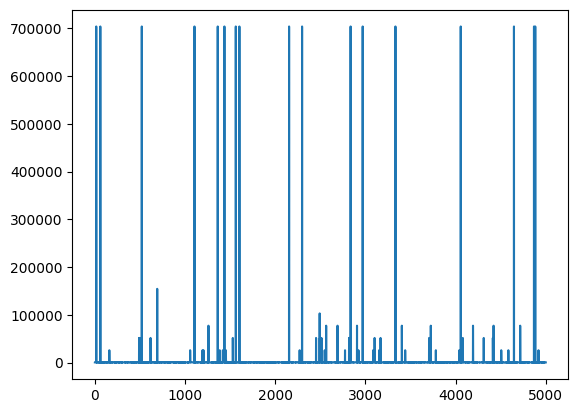

In [313]:
df["order_value"].plot()

In [7]:
#Clearly there's huge outliers since the data is unclean, which we should get rid of

In [9]:
#A better metric to use would be the median order value, as the median is a outlier-resistant statistic and wouldn't be largely effected by these

In [314]:
df["order_value"].median() #The median order value is $284, which seems a lot more reasonable looking at the data.
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [315]:
#so I'm going to replace any value over let's say 1000 with the median, 284, since those values seem to be errors
df.loc[df['order_value'] >= 1000, 'order_value'] = 284

<Axes: title={'center': 'No more crazy outliers!'}>

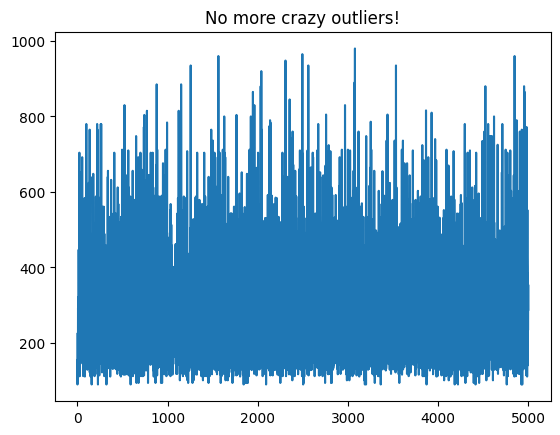

In [316]:
df["order_value"].plot(title="No more crazy outliers!")

Statistical analysis:


In [331]:
df.dtypes
a = df['created_at'][:]
a.to_frame()
Dates = pd.DataFrame()
Times = pd.DataFrame()
All = pd.DataFrame()
All = a.str.split(expand = True)
Dates = All[0]
Times = All[1]
Times.head()
df["date"] = Dates
df["time"] = Times
##Now I have all the dates and times in their own columns. Somehow this was actually extremely annoying to do because of weird things happening with the
#series datatype and struggles of doing str.split on it. But this works now

In [330]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time']) 
#converting the dates to date-time objects
print(type(df.date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<Axes: >

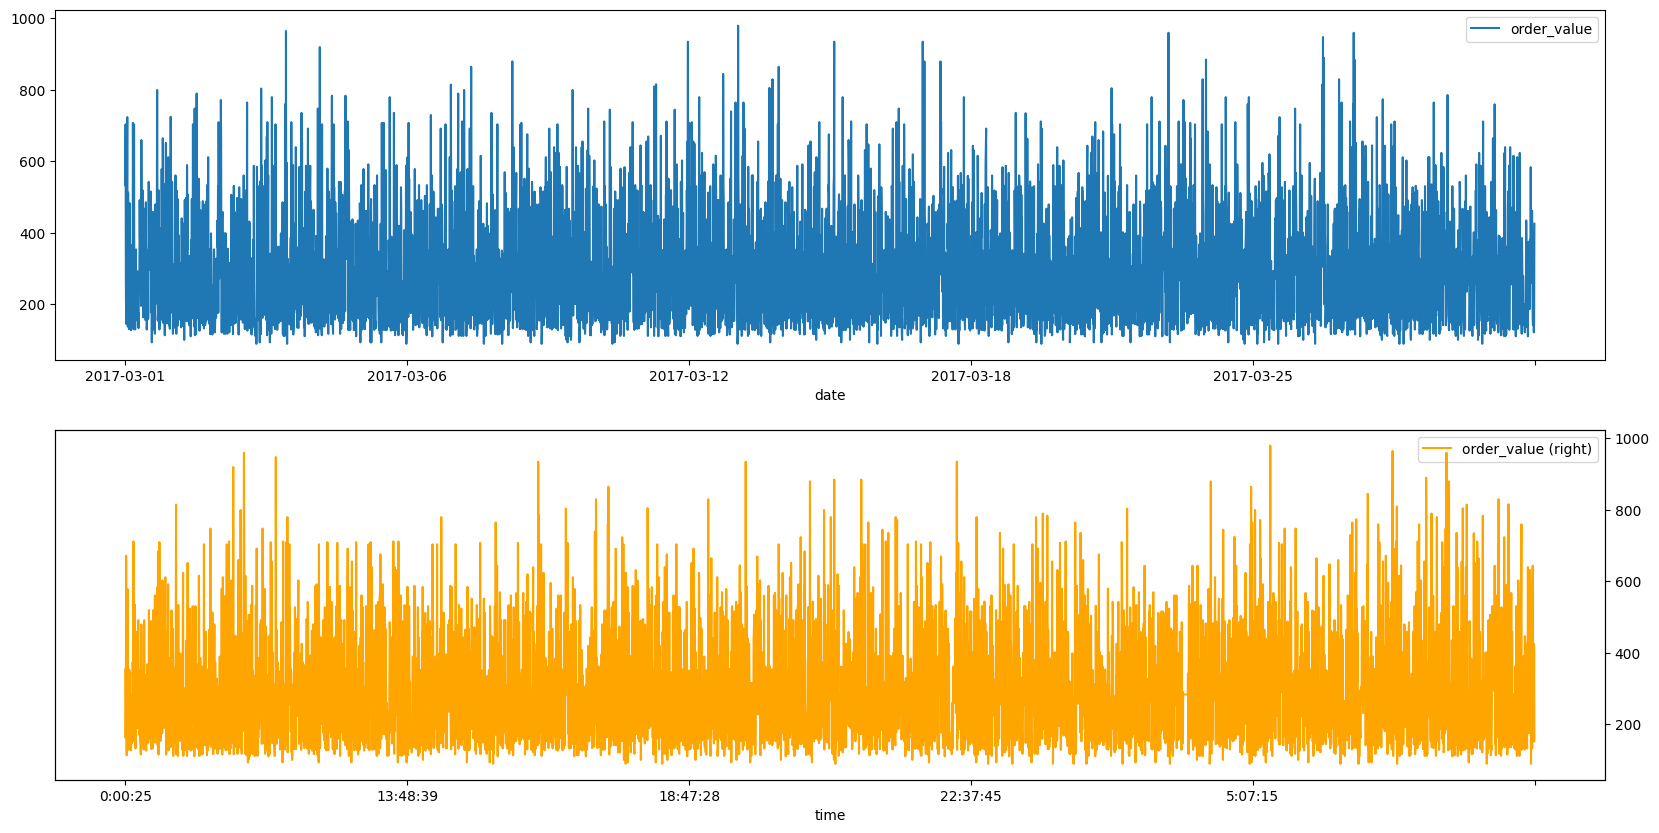

In [339]:
fig, ax = plt.subplots(figsize=(20,10), nrows = 2) 
df = df.sort_values(by='date') #now we sorted the whole list by date of purchase
df.plot(x = 'date', y = 'order_value', ax = ax[0]) 
df = df.sort_values(by='time') #now we sorted the whole list by time of purchase
df.plot(x = 'time', y = 'order_value', ax = ax[1], secondary_y = True, color = 'orange') 

Plotting all the values with respect to date and time, it doesn't seem on the surface that there's any kinds of easy to see patterns.
So we can't really assess trends in purchasing behavior from these views


That said, there most likely is some kind of pattern. For example, order value probably would go up around the holidays becuase people are buying gifts, for example.

Or if we were talking about time, obviously sales would be higher at times when people go to the store more often, for example.

It's possible that we could see these trends within the data if we grouped by hours for example, or if we grouped the data by months for the dates.

I'm a very fast learner and very willing to learn a lot of python so thanks for your consideration